In [1]:
#mport Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Ignore SQLITE warnings related to Decimal numbers in the hawaii database
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables


['measurement', 'station']

In [6]:
#Renaming the DB Table but maintaining same name
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# View all of the classes that automap found
inspector = inspect(engine)
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# View all of the classes that automap found
inspector = inspect(engine)
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recentdate = session.query(measurement.date).order_by (measurement.date.desc()).first()
recentdate

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.

pst_year= dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
pst_year
# Perform a query to retrieve the date and precipitation scores
date_precp = session.query(measurement.date, measurement.prcp).filter(measurement.date>= pst_year).all()
date_precp

# Save the query results as a Pandas DataFrame and set the index to the date column
date_precp_df =pd.DataFrame(date_precp)
date_precp_df.set_index('date', inplace=True)

# Sort the dataframe by date
date_precp_df.sort_index(inplace=True)
date_precp_df

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Precipitation')

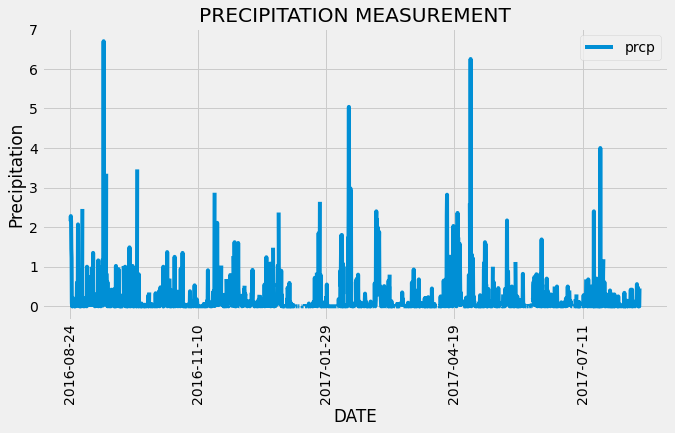

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart
date_precp_df.plot(figsize=(10, 5))
plt.title('PRECIPITATION MEASUREMENT')
plt.xlabel('DATE')
plt.xticks(rotation=90)
plt.ylabel('Precipitation')
##plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precp_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
stations_no=session.query(station.id).count()
stations_no

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

activestation=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()) 
activestation
# List the stations and the counts in descending order.
for station in activestation:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station==activestation[0][0])
temp[0][0], temp[0][1], temp[0][2]

(54.0, 85.0, 71.66378066378067)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#date_temp = session.query(measurement.date, measurement.tobs).filter(measurement.date>= pst_year).all()


In [ ]:
#filter by the station with highest number of observation
stat_obs = session.query(station.station, measurement.tobs).\
filter(station.id>= pst_year).filter(station=='USC00519281').all()
stat_obs

In [17]:
stat_obs = session.query(station.station, measurement.tobs).filter(station.station == 'USC00519281').all()
stat_obs


OperationalError: (sqlite3.OperationalError) no such column: USC00518838
[SQL: SELECT USC00518838, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE 0 = 1]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_temp_df =pd.DataFrame(date_temp)
date_temp_df.set_index('date', inplace=True)

# Sort the dataframe by date
date_temp_df.sort_index(inplace=True)
date_temp_df

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the result as a histogram
#plt.hist(x=d, bins="auto")
date_temp_df.hist(figsize=(10, 5), bins='auto')
plt.title('Temperature Observation for Most Active Station')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close session

In [ ]:
# Close Session
session.close()